In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

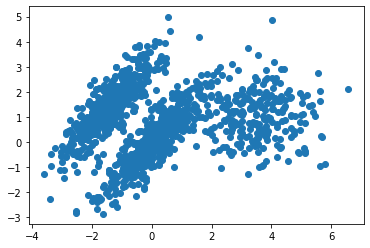

In [3]:
plt.scatter(*X.T)

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [6]:
gm.weights_

array([0.40004335, 0.39016266, 0.20979399])

In [7]:
gm.means_

array([[-1.4076523 ,  1.42716991],
       [ 0.05117982,  0.07515743],
       [ 3.39702303,  1.05884551]])

In [8]:
gm.covariances_

array([[[ 0.63481548,  0.72974885],
        [ 0.72974885,  1.16093873]],

       [[ 0.68867873,  0.79681257],
        [ 0.79681257,  1.21312026]],

       [[ 1.15308109, -0.03213395],
        [-0.03213395,  0.95393677]]])

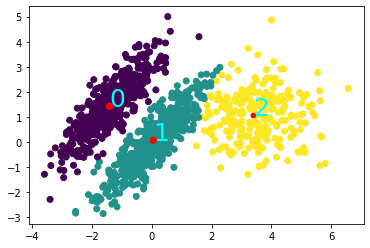

In [9]:
plt.scatter(*X.T, c = gm.predict(X))
plt.scatter(*gm.means_.T, color = 'red', s = 100*gm.weights_)
for i, j in enumerate(gm.means_):
    plt.text(gm.means_[i, 0], gm.means_[i, 1], str(i), fontsize = 25, 
            color = 'cyan')

In [10]:
gm.converged_

True

In [11]:
gm.n_iter_

6

In [12]:
gm.predict([[1, 0.1], [3, 4], [0, 10]])

array([1, 2, 2], dtype=int64)

In [13]:
gm.predict_proba([[1, 0.1], [3, 4], [0, 10]])

array([[6.29451944e-13, 8.68066607e-01, 1.31933393e-01],
       [4.17080728e-09, 3.27053457e-01, 6.72946539e-01],
       [2.29457787e-13, 2.03718866e-54, 1.00000000e+00]])

In [14]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = gm.predict(X_new).reshape(x0.shape)

In [15]:
X_new, y_new = gm.sample(10)

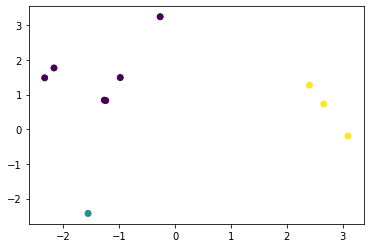

In [16]:
plt.scatter(*X_new.T, c = y_new)

In [17]:
X_new, y_new = gm.sample(1)

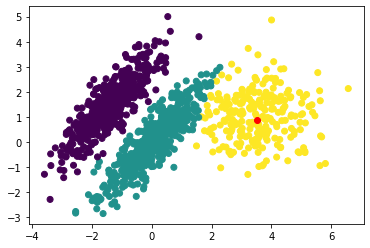

In [18]:
plt.scatter(*X.T, c = gm.predict(X))
plt.scatter(*X_new.T, color = 'red')

In [19]:
np.exp(gm.score_samples(X_new))

array([0.03103019])

In [20]:
np.exp(gm.score_samples([[-4, 5]]))

array([1.04840587e-15])

In [21]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 1000),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

score_sample = gm.score_samples(X_new).reshape(x0.shape)
y_pred = gm.predict(X_new).reshape(x0.shape)

[-3.5830831590015757,
 6.5696831854024875,
 -2.848604775181289,
 5.002442565070353]

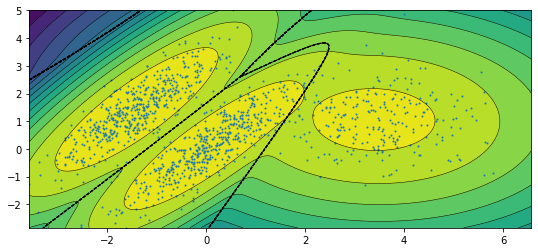

In [28]:
plt.figure(figsize = (9, 4))
plt.contourf(x0, x1, score_sample,
            levels = np.linspace(score_sample.min(), score_sample.max(), 15))
plt.contour(x0, x1, score_sample, colors = 'k', linewidths = 0.5,
           levels = np.linspace(score_sample.min(), score_sample.max(), 15),
           linestyles = 'solid')

plt.contour(x0, x1, y_pred, colors = 'k', linestyles = 'dashed',
           linewidths = 1)
plt.scatter(*X.T, s = 1)
plt.axis([X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()])